# Prepare

In [1]:
import pathlib
import warnings

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from ALLCools.mcds.MCDS import MCDS
from cemba_data.plot import cutoff_vs_cell_remain
from pybedtools import BedTool

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Parameters

In [2]:
cell_tidy_data_path = 'test_cell_tidy_data.msg'
cluster_col = 'SubType'
clustering_feature = 'chrom100k'
dask_distribute = True
in_memory = False
mcds_path_list = list(
    pathlib.Path('/home/hanliu/project/mouse_rostral_brain/dataset/').glob(
        '*mcds'))
exclude_chromosome = ['chrM', 'chrY']
black_list_path = '/home/hanliu/project/mouse_rostral_brain/misc/mm10-blacklist.v2.bed.gz'
min_feature_cov = 400
max_feature_cov = 3000
mc_type = 'CHN'

In [16]:
# Parameters
cell_tidy_data_path = "/home/hanliu/project/mouse_rostral_brain/study/FinalPredictionModelRecipe/NeuronPrediction/NonNeuronPrediction/cell_tidy_data.msg"
cluster_col = "SubType"
dask_distribute = False
in_memory = True
mcds_path_list = ["/home/hanliu/project/mouse_rostral_brain/dataset/4H-180806.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11E-190214.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5A-190205.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11E-190305.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4H-180911.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11F-190214.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5A-190307.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11F-190305.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5B-180514.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1A-180226.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5B-180529.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1A-180227.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5F-181218.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1B-180119.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5F-181220.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1B-180213.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5G-181008.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1C-180208.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5G-181009.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/1C-180212.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5H-181015.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2A-180122.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5H-181016.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2A-180123.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5J-180904.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2B-180305.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5J-180910.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2B-180306.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5J-190207.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2C-180409.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6A-190108.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2C-180410.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6A-190117.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2D-180313.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6B-181022.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2D-180319.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6B-181023.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2D-180403.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6C-190122.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2E-180220.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6C-190124.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/2E-180222.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6D-190131.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3A-180129.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/6D-190205.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3A-180130.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/7B-180423.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3B-180312.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/7B-180424.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3B-180501.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8B-180426.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3C-171206.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8B-180430.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3C-171207.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9H-190212.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3D-180412.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9H-190219.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3D-180416.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9J-190212.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3E-180320.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9J-190219.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3E-180326.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11B-190314.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3F-180109.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11B-190325.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/3F-180405.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/12B-190314.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4A-180205.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/12B-190325.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4A-180206.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9B-190326.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4B-171212.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9B-190404.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4B-171213.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9D-190326.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4B-180104.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9D-190404.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4C-180417.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10E-190625.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4C-180419.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10E-190627.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4D-171214.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10F-190625.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4D-171219.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10F-190627.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4E-180110.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10G-190423.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4E-180111.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10G-190523.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4F-180329.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8E-190711.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4F-180402.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8E-190716.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4G-180917.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8J-190711.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4G-181204.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8J-190716.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/4H-180724.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5C-181002.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10A-190423.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5C-181210.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10A-190525.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5D-180605.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10C-190411.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5D-180612.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/10C-190418.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5E-180925.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11C-190530.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/5E-181206.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/11C-190620.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/7G-190702.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/7G-190709.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8F-190718.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/8F-190723.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9A-190702.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9A-190709.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9C-190530.mcds", "/home/hanliu/project/mouse_rostral_brain/dataset/9C-190620.mcds"]
exclude_chromosome = ["chrM", "chrY"]
black_list_path = "/home/hanliu/project/mouse_rostral_brain/misc/mm10-blacklist.v2.bed.gz"
clustering_feature = "chrom100k"
min_feature_cov = 15
max_feature_cov = 200
mc_type = "CGN"


### Stable parameters

In [4]:
output_dir = 'Adata'
output_dir = pathlib.Path(output_dir)
output_dir.mkdir(exist_ok=True)

## Load Data

In [6]:
if dask_distribute:
    from dask.distributed import Client
    client = Client(dashboard_address=':5555')

### Clustering results

In [7]:
cell_tidy_data = pd.read_msgpack(cell_tidy_data_path)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Raw Count Matrix (before filter)

In [8]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    mcds = MCDS.open(mcds_path_list,
                     use_cells=cell_tidy_data.index,
                     chunks={'cell': 1000})
if in_memory:
    mcds.load()

In [9]:
mcds

<xarray.MCDS>
Dimensions:              (cell: 8167, chrom100k: 27269, count_type: 2, gene: 55487, mc_type: 2)
Coordinates:
  * mc_type              (mc_type) object 'CGN' 'CHN'
  * gene                 (gene) object 'ENSMUSG00000102693.1' ... 'ENSMUSG00000064372.1'
  * count_type           (count_type) object 'mc' 'cov'
    strand_type          <U4 'both'
    gene_chrom           (gene) object 'chr1' 'chr1' 'chr1' ... 'chrM' 'chrM'
    gene_start           (gene) int64 3073252 3102015 3205900 ... 15288 15355
    gene_end             (gene) int64 3074321 3102124 3671497 ... 15354 15421
  * cell                 (cell) object '10E_M_122' '10E_M_308' ... '9J_M_2969'
  * chrom100k            (chrom100k) int64 0 1 2 3 4 ... 27265 27266 27267 27268
    chrom100k_chrom      (chrom100k) object 'chr1' 'chr1' ... 'chrY' 'chrM'
    chrom100k_bin_start  (chrom100k) int64 0 100000 200000 ... 91700000 0
    chrom100k_bin_end    (chrom100k) int64 100000 200000 ... 91744698 16299
Data variables:
    ge

## Filter Feature

### Remove some chromosome

In [10]:
mcds = mcds.sel(
    {clustering_feature: ~mcds.coords[f'{clustering_feature}_chrom'].isin(exclude_chromosome)})

### Remove blacklist

In [11]:
spetial_char = '_bin' if clustering_feature.startswith('chrom') else ''


feature_bed_df = pd.DataFrame([
    mcds.coords[f'{clustering_feature}_chrom'].to_pandas(),
    mcds.coords[f'{clustering_feature}{spetial_char}_start'].to_pandas(),
    mcds.coords[f'{clustering_feature}{spetial_char}_end'].to_pandas()
],
                              index=['chrom', 'start', 'end'],
                              columns=mcds.get_index(clustering_feature)).T
feature_bed = BedTool.from_dataframe(feature_bed_df)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1849: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  3: pd.Panel}


In [12]:
black_list_bed = BedTool(black_list_path)
black_feature = feature_bed.intersect(black_list_bed, f=0.2, wa=True)
black_feature_index = black_feature.to_dataframe().set_index(
    ['chrom', 'start', 'end']).index
black_feature_id = pd.Index(feature_bed_df.reset_index()\
                       .set_index(['chrom', 'start', 'end'])\
                       .loc[black_feature_index][clustering_feature])

In [13]:
mcds = mcds.sel({clustering_feature: ~mcds.get_index(clustering_feature).isin(black_feature_id)})

### Remove by mean cov

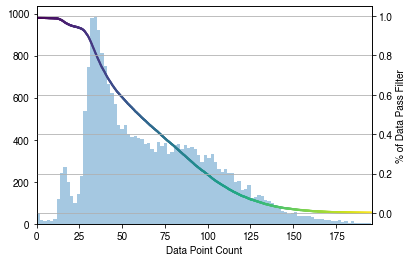

In [15]:
# only calculate CHN
fig, axes = cutoff_vs_cell_remain(mcds[f'{clustering_feature}_da']\
                                  .sel(count_type='cov', mc_type='CGN')\
                                  .mean(axis=0)\
                                  .load())

In [17]:
before = mcds.coords[clustering_feature].size
mcds = mcds.filter_region_cov(dim=clustering_feature,
                              da=f'{clustering_feature}_da',
                              mc_type=mc_type,
                              min_cov=min_feature_cov,
                              max_cov=max_feature_cov)
after = mcds.coords[clustering_feature].size
print(
    f'Filter {clustering_feature} by [{min_feature_cov}, {max_feature_cov}], '
    f'filter rate {(after / before):.2f}. {after} features remained.')

Filter chrom100k by [15, 200], filter rate 0.98. 23801 features remained.


In [18]:
mcds

<xarray.MCDS>
Dimensions:              (cell: 8167, chrom100k: 23801, count_type: 2, gene: 55487, mc_type: 2)
Coordinates:
  * mc_type              (mc_type) object 'CGN' 'CHN'
  * gene                 (gene) object 'ENSMUSG00000102693.1' ... 'ENSMUSG00000064372.1'
  * count_type           (count_type) object 'mc' 'cov'
    strand_type          <U4 'both'
    gene_chrom           (gene) object 'chr1' 'chr1' 'chr1' ... 'chrM' 'chrM'
    gene_start           (gene) int64 3073252 3102015 3205900 ... 15288 15355
    gene_end             (gene) int64 3074321 3102124 3671497 ... 15354 15421
  * cell                 (cell) object '10E_M_122' '10E_M_308' ... '9J_M_2969'
  * chrom100k            (chrom100k) int64 30 31 32 33 ... 26335 26336 26337
    chrom100k_chrom      (chrom100k) object 'chr1' 'chr1' ... 'chrX' 'chrX'
    chrom100k_bin_start  (chrom100k) int64 3000000 3100000 ... 169800000
    chrom100k_bin_end    (chrom100k) int64 3100000 3200000 ... 169900000
Data variables:
    gene_da   

## Add rate

In [19]:
mcds.add_mc_rate(dim=clustering_feature, da=f'{clustering_feature}_da')

In [20]:
data = mcds[f'{clustering_feature}_da_rate'].sel(mc_type=mc_type).values

## Make Adata

In [21]:
adata = anndata.AnnData(X=data,
                        obs=cell_tidy_data.reindex(mcds.get_index('cell')),
                        var=feature_bed_df.reindex(
                            mcds.get_index(clustering_feature)))

Transforming to str index.


In [22]:
adata

AnnData object with n_obs × n_vars = 8167 × 23801 
    obs: 'AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate', 'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region', 'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96', 'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice', 'CellClass', 'l1-umap_0', 'l1-umap_1', 'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1', 'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1', 'l3-tsne_0', 'l3-tsne_1', 'L1CellClass', 'class_tsne_0', 'class_tsne_1', 'class_umap_0', 'class_umap_1', 'Order', 'RegionName', 'MajorRegion', 'SubRegion', 'DetailRegion', 'PotentialOverlap (MMB)', 'Anterior (CCF coords)', 'Posterior (CCF coords)', 'MajorRegionColor', 'SubRegionColor', 'DissectionRegionColor', 'Replicate'
    var: 'chrom', 'start', 'end'

In [23]:
adata.write_h5ad(output_dir / 'cell_by_feature.cov_filter.rate.h5ad')

... storing 'Region' as categorical
... storing 'index_name' as categorical
... storing 'uid' as categorical
... storing 'Pos96' as categorical
... storing 'Plate' as categorical
... storing 'CellClass' as categorical
... storing 'MajorType' as categorical
... storing 'SubType' as categorical
... storing 'L1CellClass' as categorical
... storing 'RegionName' as categorical
... storing 'MajorRegion' as categorical
... storing 'SubRegion' as categorical
... storing 'DetailRegion' as categorical
... storing 'PotentialOverlap (MMB)' as categorical
... storing 'MajorRegionColor' as categorical
... storing 'SubRegionColor' as categorical
... storing 'DissectionRegionColor' as categorical
... storing 'Replicate' as categorical
... storing 'chrom' as categorical
... storing 'start' as categorical
... storing 'end' as categorical
